<a href="https://colab.research.google.com/github/cosminnedescu/ProjectMLDL/blob/main/plots/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!rm -rf ProjectMLDL
if not os.path.isdir('/content/ProjectMLDL'):
  !git clone https://github.com/cosminnedescu/ProjectMLDL.git
  %cd /content/ProjectMLDL
  !rm -rf LICENSE README.md

Cloning into 'ProjectMLDL'...
remote: Enumerating objects: 1383, done.
remote: Counting objects: 100% (290/290), done.
remote: Compressing objects: 100% (215/215), done.
remote: Total 1383 (delta 187), reused 73 (delta 73), pack-reused 1093
Receiving objects: 100% (1383/1383), 50.16 MiB | 23.45 MiB/s, done.
Resolving deltas: 100% (712/712), done.
/content/ProjectMLDL


## Plot Test Accuracies

In [ ]:
jsonfile = open("states/FineTuning/FineTuning_test_accuracy.json")
FineTuning_test_accuracy = json.load(jsonfile)

jsonfile = open("states/JointTraining/JointTraining_test_accuracy.json")
JointTraining_test_accuracy = json.load(jsonfile)

jsonfile = open("states/LWF/LWF_test_accuracy.json")
LWF_test_accuracy =json.load(jsonfile)

jsonfile = open("states/Hybrid1/Hybrid1_test_accuracy.json")
Hybrid1_test_accuracy =json.load(jsonfile)

jsonfile = open("states/iCaRL/iCaRL_test_accuracy.json")
iCaRL_test_accuracy =json.load(jsonfile)

In [ ]:
FineTuning_test_accuracy = np.array(FineTuning_test_accuracy)
JointTraining_test_accuracy = np.array(JointTraining_test_accuracy)
LWF_test_accuracy = np.array(LWF_test_accuracy)
Hybrid1_test_accuracy = np.array(Hybrid1_test_accuracy)
iCaRL_test_accuracy = np.array(iCaRL_test_accuracy)

FineTuning_test_accuracy_stats = np.array([FineTuning_test_accuracy.mean(0) * 100, FineTuning_test_accuracy.std(0) * 100]).transpose()
JointTraning_test_accuracy_stats = np.array([JointTraining_test_accuracy.mean(0) * 100, JointTraining_test_accuracy.std(0) * 100]).transpose()
LWF_test_accuracy_stats = np.array([LWF_test_accuracy.mean(0) * 100, LWF_test_accuracy.std(0) * 100]).transpose()
Hybrid1_test_accuracy_stats = np.array([Hybrid1_test_accuracy.mean(0) * 100, Hybrid1_test_accuracy.std(0) * 100]).transpose()
iCaRL_test_accuracy_stats = np.array([iCaRL_test_accuracy.mean(0) * 100, iCaRL_test_accuracy.std(0) * 100]).transpose()

In [ ]:
def plot_test_accuracy(finetuning, jointtraining, lwf, hybrid1, icarl, save_directory = None):
  finetuning_mean = np.array(finetuning)[:, 0]
  finetuning_std = np.array(finetuning)[:, 1]
  jointtraining_mean = np.array(jointtraining)[:, 0]
  jointtraining_std = np.array(jointtraining)[:, 1]
  lfw_mean = np.array(lwf)[:, 0]
  lfw_std = np.array(lwf)[:, 1]
  hybrid1_mean = np.array(hybrid1)[:, 0]
  hybrid1_std = np.array(hybrid1)[:, 1]
  icarl_mean = np.array(icarl)[:, 0]
  icarl_std = np.array(icarl)[:, 1]
  fig, ax = plt.subplots(figsize = (10, 5), dpi = 100)
  x = np.arange(10, 101, 10)
  ax.errorbar(x, finetuning_mean, finetuning_std, label = 'FineTuning')
  ax.errorbar(x, jointtraining_mean, jointtraining_std, label = 'JointTraining')
  ax.errorbar(x, lfw_mean, lfw_std, label = 'LearningWithoutForgetting')
  ax.errorbar(x, hybrid1_mean, hybrid1_std, label = 'Hybrid1')
  ax.errorbar(x, icarl_mean, icarl_std, label = 'iCaRL')
  ax.set_xlabel("Number of classes")
  plt.tight_layout()
  plt.title("Test Accuracies", loc="center")
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

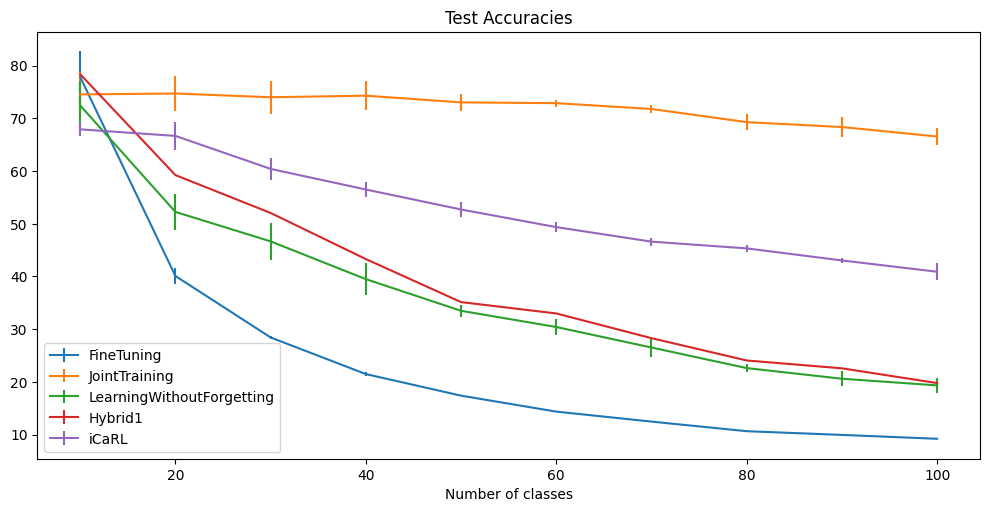

In [ ]:
plot_test_accuracy(FineTuning_test_accuracy_stats, 
                   JointTraning_test_accuracy_stats, 
                   LWF_test_accuracy_stats, 
                   Hybrid1_test_accuracy_stats,
                   iCaRL_test_accuracy_stats)

In [3]:
jsonfile = open("states/LWF/LWF_test_accuracy.json")
LWF_test_accuracy =json.load(jsonfile)
LWF_test_accuracy = np.array(LWF_test_accuracy)
LWF_test_accuracy_stats = np.array([LWF_test_accuracy.mean(0) * 100, LWF_test_accuracy.std(0) * 100]).transpose()

jsonfile = open("states/LWF/LWF_test_accuracy_trainer_validate.json")
LWF_test_accuracy_tv =json.load(jsonfile)
LWF_test_accuracy_tv = np.array(LWF_test_accuracy_tv)
LWF_test_accuracy_tv_stats = np.array([LWF_test_accuracy_tv.mean(0) * 100, LWF_test_accuracy_tv.std(0) * 100]).transpose()

In [4]:
def plot_test_accuracy(lwf, lwf_tv, save_directory = None):
  lfw_mean = np.array(lwf)[:, 0]
  lfw_std = np.array(lwf)[:, 1]
  tv_mean = np.array(lwf_tv)[:, 0]
  tv_std = np.array(lwf_tv)[:, 1]
  fig, ax = plt.subplots(figsize = (10, 5), dpi = 100)
  x = np.arange(10, 101, 10)
  ax.errorbar(x, lfw_mean, lfw_std, label = 'LearningWithoutForgetting')
  ax.errorbar(x, tv_mean, tv_std, label = 'LearningWithoutForgetting_TV')
  ax.set_xlabel("Number of classes")
  plt.tight_layout()
  plt.title("Test Accuracies", loc="center")
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

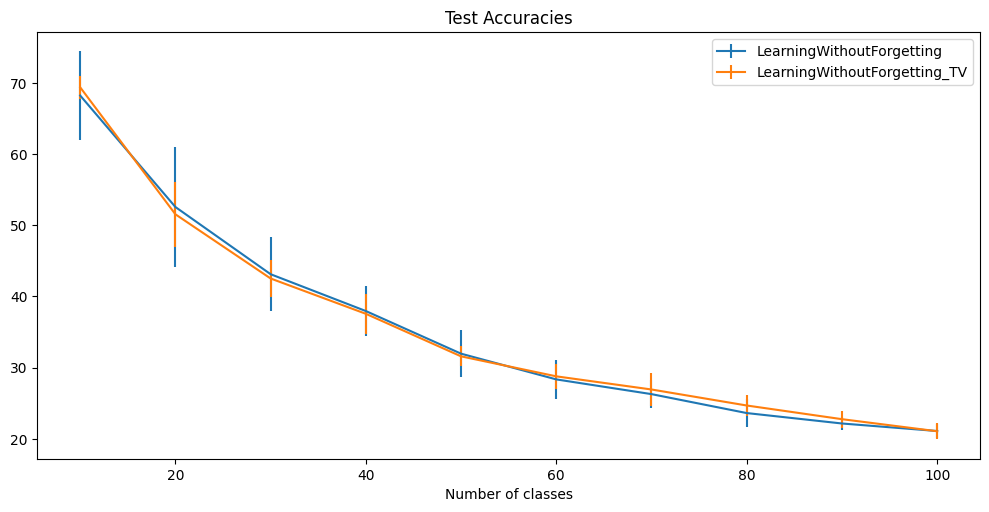

In [5]:
plot_test_accuracy(LWF_test_accuracy_stats, 
                   LWF_test_accuracy_tv_stats)

## Plot Confusion Matrix

In [ ]:
from data.utils_plot import plot_confusion_matrix

In [ ]:
jsonfile = open("states/ConfusionMatrix/LWF_predictions.json")
LWF_predictions =json.load(jsonfile)

jsonfile = open("states/ConfusionMatrix/LWF_true_labels.json")
LWF_true_labels =json.load(jsonfile)

In [ ]:
jsonfile = open("states/ConfusionMatrix/Hybrid1_predictions.json")
Hybrid1_predictions =json.load(jsonfile)

jsonfile = open("states/ConfusionMatrix/Hybrid1_true_labels.json")
Hybrid1_true_labels =json.load(jsonfile)

In [ ]:
jsonfile = open("states/ConfusionMatrix/iCaRL_predictions.json")
iCaRL_predictions =json.load(jsonfile)

jsonfile = open("states/ConfusionMatrix/iCaRL_true_labels.json")
iCaRL_true_labels =json.load(jsonfile)

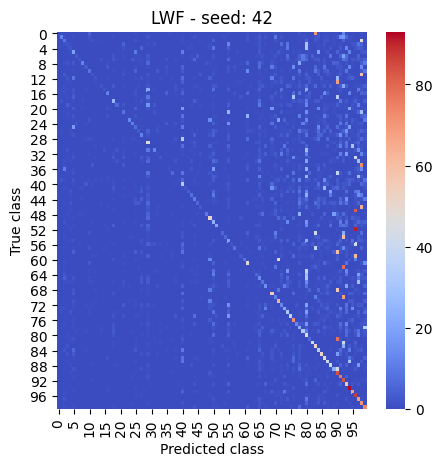

In [ ]:
targets = np.array(LWF_true_labels[0])
preds = np.array(LWF_predictions[0])

plot_confusion_matrix(targets, preds, 42, 'LWF', cmap='coolwarm')

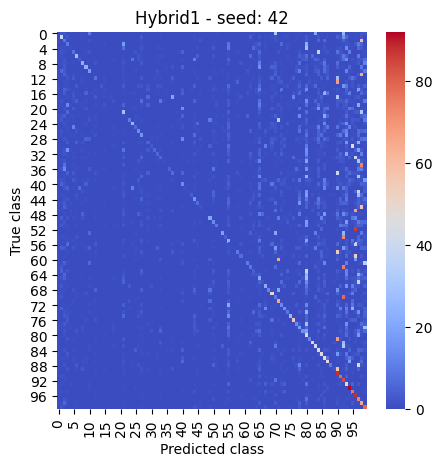

In [ ]:
targets = np.array(Hybrid1_true_labels[0])
preds = np.array(Hybrid1_predictions[0])

plot_confusion_matrix(targets, preds, 42, 'Hybrid1', cmap='coolwarm')

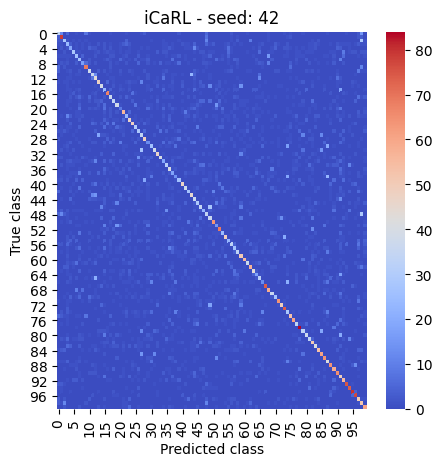

In [ ]:
targets = np.array(iCaRL_true_labels[0])
preds = np.array(iCaRL_predictions[0])

plot_confusion_matrix(targets, preds, 42, 'iCaRL', cmap='coolwarm')